<a href="https://colab.research.google.com/github/FauzanNR/Trash-Classification/blob/main/py/trash_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
path = '/content/drive/My Drive/research/trash_detector/dataset-resized' 
data_dir = pathlib.Path(path)


In [ ]:
img_count =len(list(data_dir.glob('*/*.jpg')))
img_count

2390

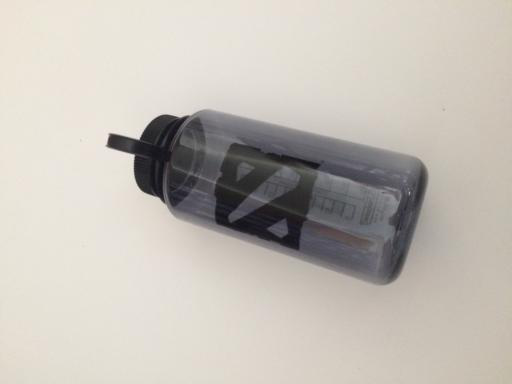

In [ ]:
PIL.Image.open(str(list(data_dir.glob('plastic/*.jpg'))[0]))

In [ ]:
batch_size = 128
image_size = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

class_names = train_ds.class_names
class_names

Found 2390 files belonging to 5 classes.
Using 1912 files for training.
Found 2390 files belonging to 5 classes.
Using 478 files for validation.


['cardboard', 'glass', 'metal', 'paper', 'plastic']

In [ ]:
# plt.figure(figsize=(10,10))
# for imgs, label in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3,3, i+1)
#     plt.imshow(imgs[i].numpy().astype("uint8"))
#     plt.title(class_names[label[i]])
#     plt.axis("off")

# plt.imshow

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
augmentation_data = keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (image_size,image_size, 3)),
                  layers.experimental.preprocessing.RandomRotation(0.1),
                  layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
# plt.figure(figsize=(8, 8))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented = augmentation_data(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented[3].numpy().astype("uint8"))
#     plt.axis("off")

In [ ]:
model = Sequential([
            augmentation_data,
            layers.experimental.preprocessing.Rescaling(1./255),
            layers.Conv2D(16, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding='same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding='same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.5),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(5)
])


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 32)       

In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = 100,
    callbacks = [earlystop]
)

Epoch 1/100
15/15 [==============================] - 3s 200ms/step - loss: 1.5911 - accuracy: 0.2479 - val_loss: 1.5491 - val_accuracy: 0.2615
Epoch 2/100
15/15 [==============================] - 1s 83ms/step - loss: 1.4976 - accuracy: 0.3305 - val_loss: 1.3957 - val_accuracy: 0.4393
Epoch 3/100
15/15 [==============================] - 1s 83ms/step - loss: 1.3632 - accuracy: 0.4006 - val_loss: 1.2457 - val_accuracy: 0.5146
Epoch 4/100
15/15 [==============================] - 1s 83ms/step - loss: 1.2611 - accuracy: 0.4597 - val_loss: 1.1954 - val_accuracy: 0.5230
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 1.2354 - accuracy: 0.4738 - val_loss: 1.2721 - val_accuracy: 0.4916
Epoch 6/100
15/15 [==============================] - 1s 83ms/step - loss: 1.1805 - accuracy: 0.4890 - val_loss: 1.1364 - val_accuracy: 0.5397
Epoch 7/100
15/15 [==============================] - 1s 83ms/step - loss: 1.1681 - accuracy: 0.5021 - val_loss: 1.2587 - val_accuracy: 0.5146
Epoch

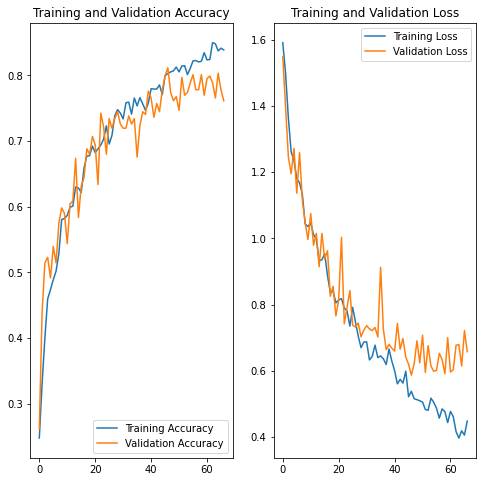

Minimum validation loss: 0.497963011264801


In [ ]:
epochs = 67

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite = converter.convert()

# with open('sampah_model.tflite','wb') as f:
#   f.write(tflite)

# /content/sampah_model.tflite

merupakan sampah cardboard dengan kecocokan 40.77%


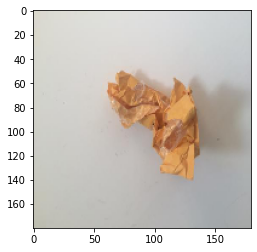

In [ ]:
predict_file = "/content/drive/MyDrive/research/trash_detector/trash/trash137.jpg" #'https://sc01.alicdn.com/kf/HLB19ofcSMTqK1RjSZPhq6xfOFXaI.jpg_350x350.jpg'#'https://waste4change.com/sendyourwaste/assets/img/waste/all/41.jpg'#"/content/drive/My Drive/research/trash_detector/dataset-resized/plastic/plastic137.jpg"#'https://waste4change.com/sendyourwaste/assets/img/waste/all/41.jpg'  #'/content/drive/My Drive/research/trash_detector/TACO-master/data/batch_11/000028.jpg'  #"/content/drive/My Drive/research/trash_detector/dataset-resized/trash/trash105.jpg" #"/content/drive/My Drive/research/trash_detector/trash/trash94.jpg"  #"/content/drive/My Drive/botol.jpg"#"/content/drive/My Drive/research/trash_detector/dataset-resized/glass/glass114.jpg" #"/content/drive/My Drive/research/trash_detector/trash/trash9.jpg"#"/content/drive/My Drive/research/trash_detector/trash/trash24.jpg"#"/content/drive/My Drive/research/trash_detector/trash/trash125.jpg"#"/content/drive/My Drive/research/trash_detector/dataset-resized/IMG_20201112_224743.jpg"#"/content/drive/My Drive/research/trash_detector/dataset-resized/glass/glass101.jpg"
# predict_file = tf.keras.utils.get_file('f', origin=predict_file)
imgpred = tf.keras.preprocessing.image.load_img(predict_file, target_size=(image_size,image_size))
imgarray = tf.keras.preprocessing.image.img_to_array(imgpred)
imgarray = tf.expand_dims(imgarray, 0)
predscore = model.predict(imgarray)
score = tf.nn.softmax(predscore[0])
# # score.numpy(imgpred)
# # PIL.Image.open()
plt.imshow(imgpred)
print(
    "merupakan sampah {} dengan kecocokan {:.2f}%"
    .format(class_names[np.argmax(score)], np.max(score)*100)
)